# Semana 6: Mini-Proyecto Final

Esta evaluación tiene por propósito poner en práctica la identificación de tareas de visualización, la búsqueda de codificaciones, y la generación de codificaciones mediante programación. El siguiente archivo contiene un texto narrativo que informa detalles sobre un _dataset_ complejo y que busca apoyarse de visualizaciones para transmitir información.

En el documento se marcan las ubicaciones donde distintas codificaciones deben insertarse mediante celdas de código. 
Cada ubicación tiene además información que se provee sobre los datos y las tareas que buscan completar en dicha codificación.
En cada una de estas ubicaciones, debe: (1) identificar **una** tarea (una acción y un objetivo) utilizando los términos del *framework* revisado, (2) elegir **una** codificación gráfica acorde, de tal forma que ambas correspondan a la información dada, y (3) justificar en **un párrafo de máximo de 5 líneas** por qué la codificación elegida permite resolver la tarea identificada. Se proveen los datos necesarios para generar dichas codificaciones, y puedes utilizar `pandas`, `matplotlib` y `seaborn` para generar las distintas visualizaciones.

El documento de respuesta y entrega es este mismo documento Jupyter Notebook. Debe completarse con:
* El código de cada visualización con todas las celdas ejecutadas. Sólo es el código para **1 respuesta por visualización**. Si identifica más de una forma de realizar la visualización, **debe seleccionar una**. En caso de entregar más de 1 código por visualización, **se considera el primer código**.

* **Una tarea (una acción y un objetivo)** identificada para cada visualización de la lista indicada en la clase ¿Por qué? En caso de responder más de una tarea, **se considera la primera entregada**.

    Recuerde que una tarea se compone de una acción y un objetivo. Las **acciones del _framework_ son:** presentar, descubrir, anotar, grabar, derivar, _lookup_, _browse_, _locate_, _explore_, identificar, comparar, resumir; y los objetivos deben ser extraídos del texto de cada caso. Algunos **ejemplos de objetivos son:** tendencia, outlier, features, distribución, extremos, dependencia, correlación, similaridad, etc.

* **Un párrafo de máximo 5 líneas para justificar** cada gráfico en relación con **la tarea identificada**. Sólo se acepta la justificación acorde a **la tarea identificada (primera tarea entregada)** en el punto anterior. En caso de entregar justificaciones para otras tareas, estas no serán consideradas.


## La gran pandemia

Durante el 2015 hubo una gran pandemia a nivel mundial. Luego de un año del descubrimiento del virus, se realizó un catastro de enfermos. Cómo es posible observar en el siguiente gráfico, los resultados indicaron que los países más afectados fueron Francia, Japón y México, con más de 9.5 millones, 10.2 millones y 10.3 millones de contagiados respectivamente.


**Visualización 1 (V01)**

**Tarea identificada**: Identificar, outlier.

**Justificación**: El grafico mas preciso para identificar los paises mas afectados es el de barras en posición horizontal porque apreciamos mas facilmente el extremo superior los 3 primeros paises mas afectados.

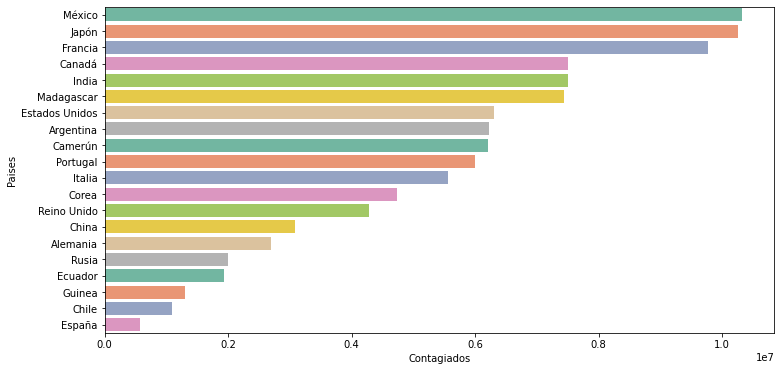

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)  
# V01: Visualización que permite ver la cantidad total de infectados por país
# Dataset: V01.csv 
df = pd.read_csv("V01.csv")

ax = sns.barplot(x="Contagiados", y="Paises", palette = "Set2", data=df.sort_values(by='Contagiados', ascending=False))



Explorando los datos históricos de esta pandemia, fue posible recopilar la información de cantidad de contagiados internacionalmente durante los primeros 5 años y los resultados mostraron un crecimiento exponencial de los casos.

**Visualización 2 (V02)**

**Tarea identificada**: Presentar, Tendencias.

**Justificación**: Al querer mostrar tendencias en donde tenemos un eje con valores temporales en este caso años lo mejor sería utilizar el grafico de linea. Ya que podemos ver la curva exponencial.

<AxesSubplot:xlabel='Año', ylabel='Total Contagiados'>

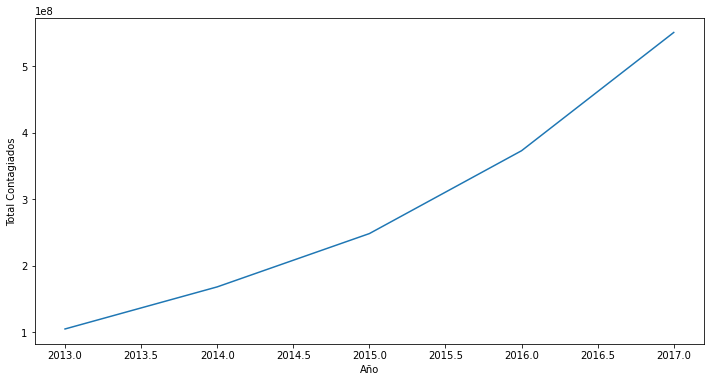

In [2]:
# V02: Visualización que permita ver la evolución del total de infectados en el tiempo (fecha).
# Dataset: V02.csv 

df = pd.read_csv("V02.csv")

df.tail()

sns.lineplot(x="Año", y="Total Contagiados", data=df)


Ahora, comparando la situación por país, es posible notar cómo en algunos países, como Chile, la infección fue controlada mientras en otros no, como México. Esto se explica por la anticipada toma de decisiones en salud realizados en varios de estos países.


**Visualización 3 (V03)**

**Tarea identificada**: Comparar, Tendencias.

**Justificación**: Para comparar varias tendencias de mejor manera en donde cada grafico sea un pais con su grafico de linea lo ideal sería usar small multiples.

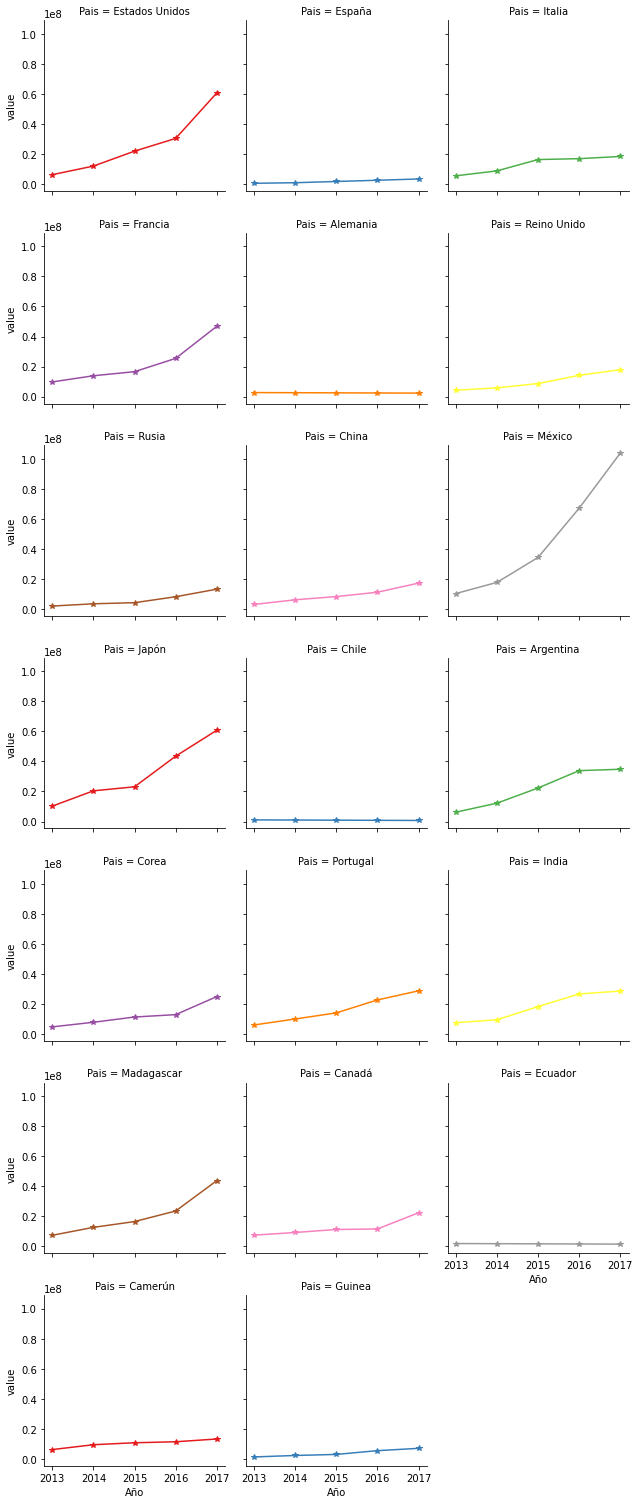

In [3]:
# V03: Visualización que permita ver el total de infectados en el tiempo por país (fecha).
# Dataset: V03.csv 

df = pd.read_csv("V03.csv")
df = df.melt(id_vars=["Pais"], var_name="Año")
grid = sns.FacetGrid(
    data=df,
    col="Pais",
    col_wrap=3,
    hue="Pais",
    palette='Set1'
)
grid.map(plt.plot, "Año", "value" , marker="*")

Las visualizaciones anteriores colocan la evolución del contagios según las fechas de ocurrencia, pero la realidad es que cada país tuvo su primer infectado en distintos momentos. Al encontrarse en distintas escalas de tiempo, surge la interrogante de cómo distribuyen los crecimientos de contagios bajo una misma escala de tiempo, que corresponde al tiempo que lleva el país con infecciones presentes. Por ejemplo, se encontró que a los dos meses de infección, el mínimo de contagios presentes en un país fue de 783 casos, el máximo de 8055 casos, y la mediana a nivel mundial fue de 2876 casos aproximadamente. 


**Visualización 4 (V04)**

**Tarea identificada**: Discover, Distribución.

**Justificación**: El grafico ideal para comparar distribución con mediana es el de violin porque nos muestra mas información respecto a lo requerido.

In [4]:
df = pd.read_csv("V04.csv")
df.head(13)

,Pais,Mes,Contagiados
0,Estados Unidos,1,5230
1,Estados Unidos,2,4785
2,Estados Unidos,3,4217
3,Estados Unidos,4,704
4,Estados Unidos,5,8694
5,Estados Unidos,6,1139
6,Estados Unidos,7,8994
7,Estados Unidos,8,8225
8,Estados Unidos,9,1988
9,Estados Unidos,10,7594


<AxesSubplot:xlabel='Mes', ylabel='Contagiados'>

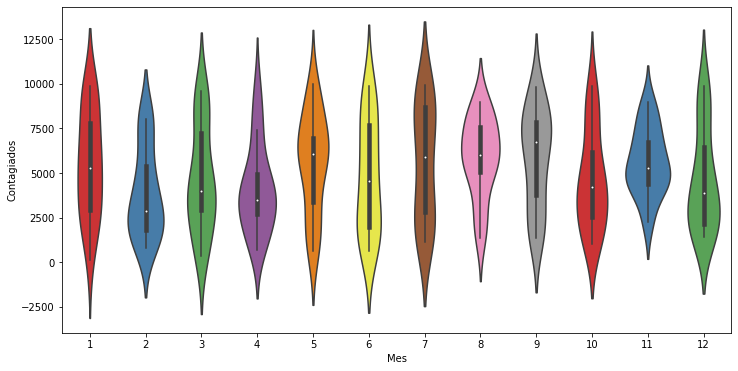

In [5]:
# V04: Visualización que permite ver la distribución de número de contagios de países en función al tiempo de infección.
# Dataset: V04.csv 

df = pd.read_csv("V04.csv")
df.head(13)
sns.violinplot(
    x="Mes",
    y="Contagiados",
    data=df,
    palette="Set1"
    )


Otra interrogante que surgió fue ¿este virus fue más letal en épocas y lugares de bajas temperaturas, de altas temperaturas o la temperatura no tuvo efecto? En base a los datos reunidos de facellimientos registrados por mes en los 5 primeros años, fue posible observar lo siguiente para cada hemisferio:


**Visualización 5 (V05)**

**Tarea identificada**: Observar, Distribución.

**Justificación**:En este caso en particular el heatmap nos permitira ver los meses de mayor fallecidos a lo largo de la pandemia identificando zonas de tiempo donde hubieron mas fallecidos.

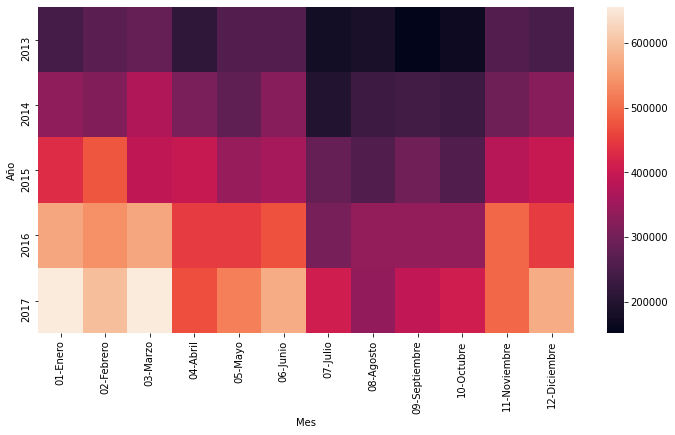

In [6]:
# V05: Dos visualizaciones (uno por hemisferio) que permita visualizar la cantidad de fallecimientos por mes y año. 
# De modo que permita determinar si hubo algunos meses en particular donde aumentó la cantidad de fallecidos o
# siempre se mantuvo de forma homogénea
# Datasets: V05-hem-norte.csv y V05-hem-sur.csv
df_norte = pd.read_csv("V05-hem-norte.csv")
df_pivoteado_norte =  df_norte.pivot(index="Año", columns="Mes", values="Fallecidos")
ax = sns.heatmap(df_pivoteado_norte)



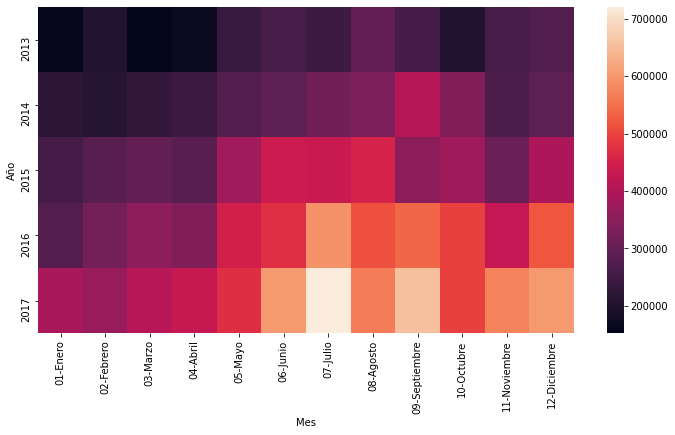

In [7]:
df_sur = pd.read_csv("V05-hem-sur.csv")
df_pivoteado_sur =  df_sur.pivot(index="Año", columns="Mes", values="Fallecidos")
ax = sns.heatmap(df_pivoteado_sur)


Por otro lado, esta pandemia que se caracterizó por una división etárea muy marcada entre sus contagiados. El 60% de los contagiados eran personas sobre 50 años, 30% eran menores a los 18 años y solo el 10% restante oscila entre 19 y 49 años. Por otro lado, el 80% presentaba como síntomas base: fiebre, tos y malestar estomacal; mientras que el 20% restante presentó síntomas extendidos a los anteriores, agregando dificultad para respirar. 

**Visualización 6 (V06)**

**Tarea identificada**: Comparar, Distribución.

**Justificación**: En este caso como se desea comparar la distrubución de los datos y ademas considerando que son pocas las categorias posibles es posible utilizar el grafico de torta.

Edad
19-49     40
<=18     120
>=50     240
dtype: int64


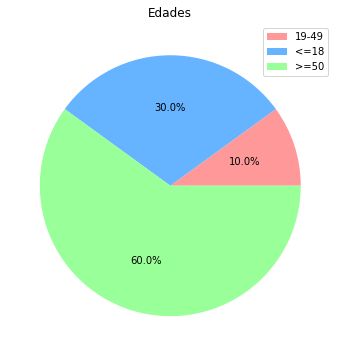

In [8]:
# V06: Dos visualizaciones que permitan mostrar la proporción de infectados por edad y la proporción de síntomas posibles.
# Dataset: V06.csv 

df = pd.read_csv("V06.csv")
df_agrupado = df.groupby("Edad").size()
print(df_agrupado)
pie_chart = plt.pie(df_agrupado, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("Edades")
plt.legend(
    pie_chart[0],
    df_agrupado.index,
)
plt.show()

Sintomas
base         319
extendido     81
dtype: int64


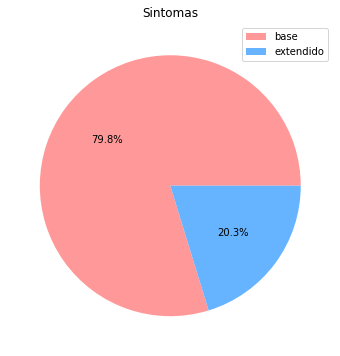

In [9]:
df_agrupado2 = df.groupby("Sintomas").size()
print(df_agrupado2)
pie_chart = plt.pie(df_agrupado2, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("Sintomas")
plt.legend(
    pie_chart[0],
    df_agrupado2.index,
)
plt.show()

Además de esta segmentación etárea y de diagnóstico, la investigación inicial no tenía una caracterización más profunda. Fue tras cruzar y analizar la correlación de atributos de edad, peso y altura de contagiados; e identificando aquellos con síntomas base o síntomas extendidos, que se logró obtener una mejor descripción de perfiles.


**Visualización 7 (V07)**

**Tarea identificada**: Obtener , Correlación.

**Justificación**: En esta ocasión para la distribución de varias variables sería bueno utilizar el grafico de dispersión con enfasis en usar varios canales como el areá y color ademas de posición x e y.

     Edad   Sintomas  Peso  Altura
0      70       base    72     155
1      71       base    61     161
2      83       base    66     179
3      77       base    63     190
4      76       base    80     164
..    ...        ...   ...     ...
395     4  extendido    49     104
396    14  extendido    81     124
397     5  extendido    58     119
398    15  extendido    61      99
399     9  extendido    53     100

[400 rows x 4 columns]


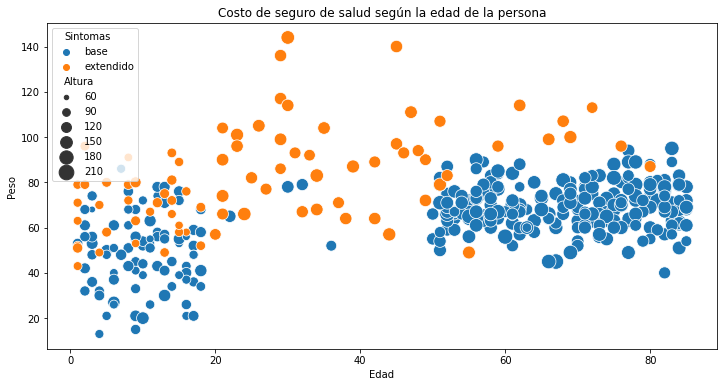

In [10]:
# V07: Visualización que permita apreciar distribución y potencialmente correlación entre pares de atributos de 
# dataset: edad, peso y altura; con categorización por tipos de síntomas presentados.
# Dataset: V07.csv 

df = pd.read_csv("V07.csv")
print(df)

ax = sns.scatterplot(x="Edad", y="Peso", hue="Sintomas",
                     size="Altura", sizes=(20, 250), data=df)

ax.set_title('Costo de seguro de salud según la edad de la persona')
plt.show()